In [625]:
import pandas as pd
import numpy as np

#문제 1 - 2
df = pd.read_csv("../data/CARD_SUBWAY_MONTH_202108.csv") 
df.to_csv("../data/CARD_SUBWAY_MONTH_202108_1.csv", index=True) 
df = pd.read_csv("../data/CARD_SUBWAY_MONTH_202108_1.csv") 
del df["등록일자"] 
df.rename( 
    columns={
        "Unnamed: 0": "사용일자",
        "사용일자":"노선명",
        "노선명" : "역명",
        "역명": "승차총승객수",
        "승차총승객수": "하차총승객수",
        "하차총승객수" :"등록일자"
    },inplace=True
)

df.head()
#


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210801,중앙선,회기,10269,10305,20210804
1,20210801,일산선,마두,2306,2354,20210804
2,20210801,일산선,정발산,3334,3307,20210804
3,20210801,일산선,주엽,3047,3044,20210804
4,20210801,일산선,대화,4520,4151,20210804


In [626]:
#문제3 : 피벗테이블 노선명을 index로 설정... "승차총승객수","하차총승객수" 컬럼만 보이기
q3 = df.pivot_table(
    index= "노선명",
    values = ["승차총승객수","하차총승객수"],
    aggfunc = np.sum
)
q3.head()

,승차총승객수,하차총승객수
노선명,,
1호선,4930790,4809891
2호선,29827011,30050336
3호선,11399211,11346523
4호선,10701190,10764499
5호선,14125719,14070037


In [627]:
#문제4 : "승하차승객차이" 절대값으로 표현
q3["승하차승객차이"] = q3["승차총승객수"] - q3["하차총승객수"]
q4 = q3.abs() ## 절대값표현
q4.head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
1호선,4930790,4809891,120899
2호선,29827011,30050336,223325
3호선,11399211,11346523,52688
4호선,10701190,10764499,63309
5호선,14125719,14070037,55682


In [628]:
#문제 5 : 문제4 >> "승하차승객차이" 내림차순 정렬 
q4.sort_values(by="승하차승객차이", ascending=False,inplace=True)
q5 = q4
q5.head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
분당선,8079076,8333771,254695
2호선,29827011,30050336,223325
7호선,15582172,15384310,197862
공항철도 1호선,2224849,2040579,184270
1호선,4930790,4809891,120899


In [629]:
#문제6 : 문제4 >> "송차총승객수" 내림차순 정렬 "승객수많은 노선 5개"
q6 = q4.sort_values("승차총승객수", ascending=False)
q6.head()

,승차총승객수,하차총승객수,승하차승객차이
노선명,,,
2호선,29827011,30050336,223325
7호선,15582172,15384310,197862
5호선,14125719,14070037,55682
3호선,11399211,11346523,52688
4호선,10701190,10764499,63309


In [630]:
#문제7 : 문제2 >> 인덱스를 "역명"으로 
q7 = df.pivot_table(
    index= "역명",
    values = ["승차총승객수","하차총승객수"],
    aggfunc = np.sum
)
q7.head()

,승차총승객수,하차총승객수
역명,,
4.19민주묘지,70507,65925
가능,161898,156084
가락시장,376994,390942
가산디지털단지,1355697,1412051
가양,467975,456605


In [631]:
#문제 8 : 문제7>> "승차총승객수" 가장 많은 5개
q8 = q7.sort_values(by="승차총승객수",ascending=False)
q8.head()

,승차총승객수,하차총승객수
역명,,
강남,1874711,1819150
잠실(송파구청),1865925,1886470
고속터미널,1660283,1640472
서울역,1572730,1541382
홍대입구,1525530,1553713


In [632]:
#문제9 : 문제2 >> 인덱스 "역명" , 
q9 = pd.pivot_table(
    data = df,
    index = "역명",
    values = ["승차총승객수","하차총승객수"],
    aggfunc=[np.sum,np.mean,np.std]
)
q9.head()

sum                   mean                         std  \
           승차총승객수   하차총승객수        승차총승객수        하차총승객수        승차총승객수   
역명                                                                     
4.19민주묘지    70507    65925   2274.419355   2126.612903    373.593877   
가능         161898   156084   5222.516129   5034.967742   1134.607124   
가락시장       376994   390942   6080.548387   6305.516129   1939.749956   
가산디지털단지   1355697  1412051  21866.080645  22775.016129  15270.379943   
가양         467975   456605  15095.967742  14729.193548   4373.801127   

                        
                하차총승객수  
역명                      
4.19민주묘지    410.761705  
가능         1121.264033  
가락시장       1849.094894  
가산디지털단지   14499.365939  
가양         4240.535174

In [633]:
#문제 10 : 문제9 >> 컬럼명 변경
#q9.columns = q9.columns.droplevel(0)
q9.columns = ["총승차","총하차","일평균승차","일평균하차","승차표준편차","하차표준편차"]
q10 = q9
q10.head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
4.19민주묘지,70507,65925,2274.419355,2126.612903,373.593877,410.761705
가능,161898,156084,5222.516129,5034.967742,1134.607124,1121.264033
가락시장,376994,390942,6080.548387,6305.516129,1939.749956,1849.094894
가산디지털단지,1355697,1412051,21866.080645,22775.016129,15270.379943,14499.365939
가양,467975,456605,15095.967742,14729.193548,4373.801127,4240.535174


In [634]:
#문제 11 : 문제 10 >> "총승차" 컬럼 기준 총승차인원이 많은 역 
q11 = q10.sort_values(by="총승차",ascending=False)
q11.head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
고속터미널,1660283,1640472,17852.505376,17639.483871,10305.355931,9924.724468
서울역,1572730,1541382,9891.383648,9694.226415,10756.755773,10541.777127
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [635]:
#문제 12 : 문제 10 >> "승차표준편차" 컬럼 기준 총승차인원이 많은 역 
q12 = q10.sort_values(by="승차표준편차",ascending=False)
q12.head()

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
잠실(송파구청),1865925,1886470,30095.564516,30426.935484,20723.699517,19816.862422
선릉,1461878,1458286,23578.677419,23520.741935,19241.780971,15615.806441
강남,1874711,1819150,60474.548387,58682.258065,18723.322383,18262.922793
신도림,1202149,1174705,19389.500000,18946.854839,17691.419244,17096.513503
홍대입구,1525530,1553713,16058.210526,16354.873684,17306.631205,17690.730638


In [636]:
#문제 13 : 문제 10 >> "승차표준편차" 기준 총승차인원이 적은 역 10개
q13 = q10.sort_values(by="승차표준편차",ascending=True)
q13.head(10)

,총승차,총하차,일평균승차,일평균하차,승차표준편차,하차표준편차
역명,,,,,,
지평,1852,2019,59.741935,65.129032,14.059321,12.914441
달월,2282,1577,73.612903,50.870968,23.931398,9.433069
임진강,912,686,29.419355,22.129032,25.718702,22.685887
세종대왕릉,7758,7768,250.258065,250.580645,27.029574,32.417870
오빈,7963,7851,256.870968,253.258065,31.290831,37.001773
원덕,9789,9051,315.774194,291.967742,31.410943,36.381757
백양리,4068,3495,131.225806,112.741935,33.982064,28.904403
굴봉산,4936,4416,159.225806,142.451613,37.863535,33.719271
신원,5910,4734,190.645161,152.709677,40.725543,22.803791


In [637]:
#문제 14 : 문제2 >> "역명":"강남"
q14 = df[ df["역명"]=="강남" ]
q14.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
535,20210801,2호선,강남,22794,21657,20210804
1172,20210802,2호선,강남,70147,68166,20210805
1271,20210803,2호선,강남,70995,68779,20210806
1981,20210804,2호선,강남,70275,68322,20210807
2477,20210805,2호선,강남,70718,68542,20210808


In [638]:
#문제 15 : 문제 14 >> info
q15 = q14
q15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    31 non-null     int64 
 1   노선명     31 non-null     object
 2   역명      31 non-null     object
 3   승차총승객수  31 non-null     int64 
 4   하차총승객수  31 non-null     int64 
 5   등록일자    31 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.7+ KB


In [639]:
#문제 16 : 문제14 >> "사용일자" 컬럼 datetime으로 변경
q14["사용일자"] = q14["사용일자"].astype('str')
q14["사용일자"] = pd.to_datetime(q14["사용일자"])
q16 = q14
q16.info()
q16.head()
#q14.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 535 to 18087
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    31 non-null     datetime64[ns]
 1   노선명     31 non-null     object        
 2   역명      31 non-null     object        
 3   승차총승객수  31 non-null     int64         
 4   하차총승객수  31 non-null     int64         
 5   등록일자    31 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.7+ KB


C:\Users\82103\AppData\Local\Temp/ipykernel_72408/515725295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q14["사용일자"] = q14["사용일자"].astype('str')
C:\Users\82103\AppData\Local\Temp/ipykernel_72408/515725295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q14["사용일자"] = pd.to_datetime(q14["사용일자"])


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
535,2021-08-01,2호선,강남,22794,21657,20210804
1172,2021-08-02,2호선,강남,70147,68166,20210805
1271,2021-08-03,2호선,강남,70995,68779,20210806
1981,2021-08-04,2호선,강남,70275,68322,20210807
2477,2021-08-05,2호선,강남,70718,68542,20210808


In [640]:
# 문제 17 : matplotlib에서 한글 표시
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False #한글깨지지않게
rc("font", family="Malgun Gothic")
%matplotlib inline 

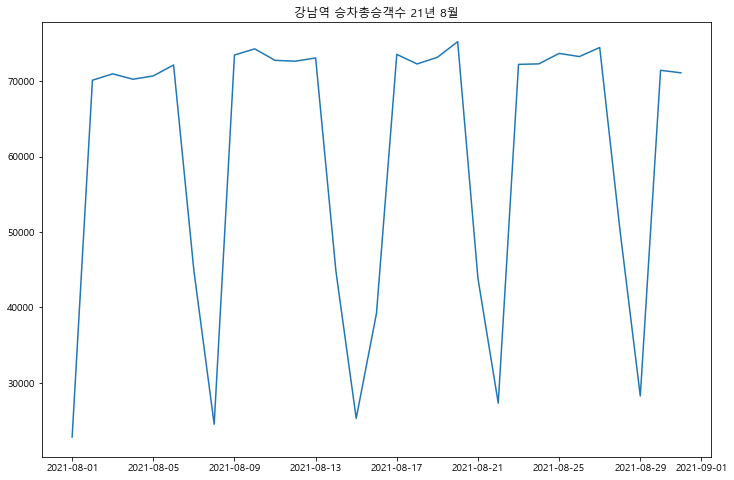

,승차총승객수
사용일자,
2021-08-01,22794
2021-08-02,70147
2021-08-03,70995
2021-08-04,70275
2021-08-05,70718


In [641]:
#문제 18 : 문제 14 - 16 >> 8월 한달간 강남역 승차객의 현황 그래프
#q18 = q14.set_index("사용일자")
q18 = q16[ ["사용일자","승차총승객수"] ].set_index("사용일자")

plt.figure(figsize=(12,8))
plt.plot( 
    q18.index, 
    q18["승차총승객수"]
); 
plt.title("강남역 승차총승객수 21년 8월")
plt.show()
q18.head()


In [642]:
#문제 19 : 문제 2 >> 팔당역데이터
q19 = df[ df["역명"]=="팔당"]
q19.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
590,20210801,중앙선,팔당,978,928,20210804
623,20210802,중앙선,팔당,758,753,20210805
1214,20210803,중앙선,팔당,838,792,20210806
1928,20210804,중앙선,팔당,779,801,20210807
2432,20210805,중앙선,팔당,848,827,20210808


In [646]:
# 문제 19 전처리
q19["사용일자"] = q19["사용일자"].astype('str')
q19["사용일자"] = pd.to_datetime(q19["사용일자"])
q19 = q19.loc[:,["사용일자","승차총승객수"]]
q19.head()

C:\Users\82103\AppData\Local\Temp/ipykernel_72408/2073848328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q19["사용일자"] = q19["사용일자"].astype('str')
C:\Users\82103\AppData\Local\Temp/ipykernel_72408/2073848328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q19["사용일자"] = pd.to_datetime(q19["사용일자"])


,사용일자,승차총승객수
590,2021-08-01,978
623,2021-08-02,758
1214,2021-08-03,838
1928,2021-08-04,779
2432,2021-08-05,848


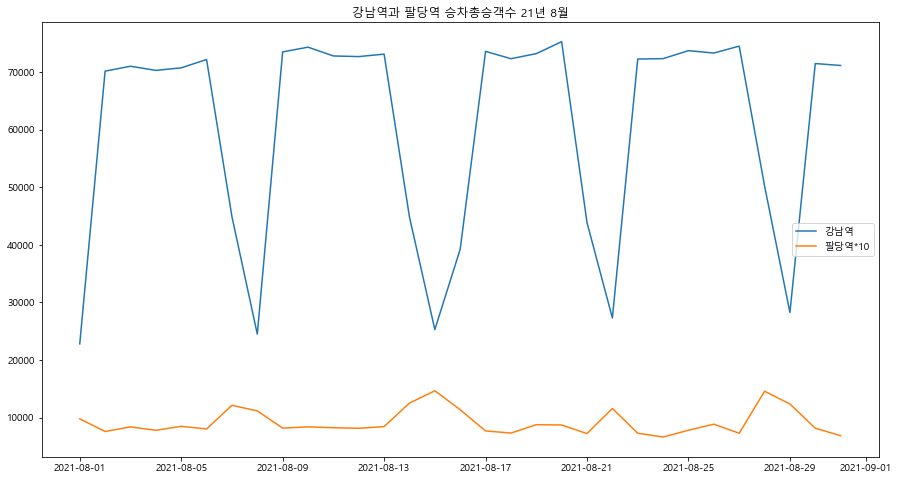

In [647]:
#문제 20 : 문제 19 >> 
def drawGraph():
    plt.figure(figsize=(15,8))
    plt.plot( 
        q18.index, 
        q18["승차총승객수"],
        label = "강남역"
    ); 
    plt.plot(
        q18.index,
        q19["승차총승객수"]*10,
        label = "팔당역*10"
    )
    plt.legend(loc= "right")
    plt.title("강남역과 팔당역 승차총승객수 21년 8월")
    plt.show()
drawGraph()

